In [1]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt 
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv("Test_data/test_scaled_data.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,2.652318,1.778113,2.606227,2.963243,-0.066095,1.286504,1.391341,2.026141,0.425758,0.068520,...,1.443859,3.021145,3.719984,0.687803,1.112159,1.581526,2.288284,0.373438,0.203037,0.0
1,-0.696205,-0.211741,-0.680078,-0.678307,1.316561,-0.012481,-0.210090,-0.341537,0.018776,0.375572,...,0.588600,-0.633210,-0.617789,1.601536,0.120573,0.100134,0.136897,-0.120915,0.451600,1.0
2,-0.334438,-0.817449,-0.306262,-0.376847,-1.289575,-0.127730,0.315560,-0.366853,-1.371749,-0.475733,...,-0.970413,-0.432734,-0.485451,-1.468074,-0.111428,0.336895,-0.177597,-1.464156,-0.714279,1.0
3,0.938985,0.663426,0.965802,0.871849,-0.435093,0.487579,0.128362,0.730247,1.175662,-1.161144,...,0.259530,0.955732,0.767011,-0.843912,0.260585,-0.188906,0.621937,0.313516,-0.503000,0.0
4,-0.288131,-0.151861,-0.263888,-0.390168,0.882446,0.548133,0.116251,0.222868,0.900572,0.347923,...,-0.129817,-0.369043,-0.493330,0.078649,0.119220,-0.050670,0.199483,0.390083,-0.010017,1.0


In [3]:
X = df.iloc[: , 0:-1]
y = df.iloc[: , -1]

In [4]:
logistic_regression_model = pickle.load(open("SaveModels/logisticRegressionModel", "rb"))

naive_bayes_model = pickle.load(open("SaveModels/naiveBayesModel", "rb"))

svc_model = pickle.load(open("SaveModels/svcModel", "rb"))

decision_tree_model = pickle.load(open("SaveModels/decisionTreeClassifierModel", "rb"))

random_forest_model = pickle.load(open("SaveModels/randomForestClassifierModel", "rb"))

In [5]:
models = [logistic_regression_model, naive_bayes_model, svc_model, decision_tree_model, random_forest_model]
models_name = ['Logistic Regression', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest']

# Model Evaluation

In [6]:
models_classification_report = []
models_prediction = []
for model in models:
    y_pred = model.predict(X)
    models_prediction.append(y_pred)
    report = classification_report(y, y_pred)
    models_classification_report.append(report)

In [7]:
for index in range(len(models_classification_report)):
    print("-----------------------------------------------------")
    print("\t\t\t",models_name[index])
    print(models_classification_report[index])
    print("\n\n\n")

-----------------------------------------------------
			 Logistic Regression
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        48
         1.0       0.98      0.97      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





-----------------------------------------------------
			 Naive Bayes
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        48
         1.0       0.96      0.97      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





-----------------------------------------------------
			 SVC
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        48
         1.0       

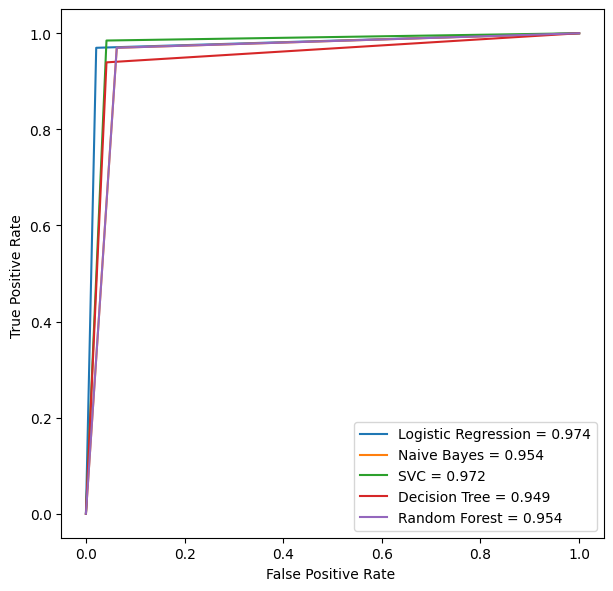

In [8]:
plt.figure(figsize = (7,7), dpi=100)
for index in range(len(models_prediction)):
    model_fpr, model_tpr, threshold = roc_curve(y, models_prediction[index])
    model_auc = auc(model_fpr, model_tpr)
    plt.plot(model_fpr, model_tpr, linestyle='-', label=f'{models_name[index]} = %0.3f' % model_auc)


plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')

plt.legend()
plt.show()

## Confusion matrix

		 Logistic Regression


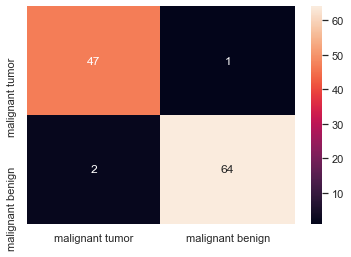




		 Naive Bayes


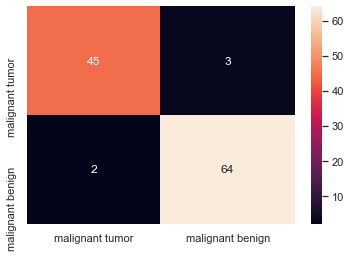




		 SVC


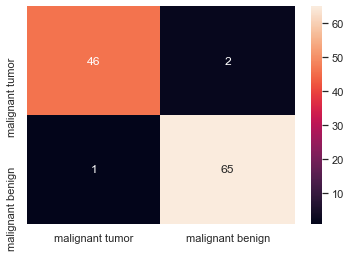




		 Decision Tree


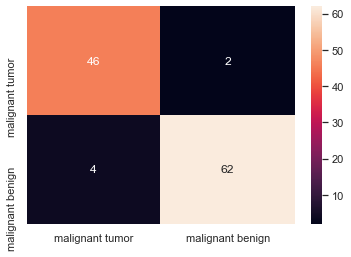




		 Random Forest


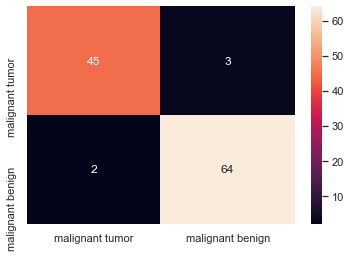

In [9]:
class_labels = ['malignant tumor','malignant benign']
sns.set()
for index in range(len(models_prediction)):
    print("\t\t",models_name[index])
    cm = confusion_matrix(y, models_prediction[index])
    sns.heatmap(cm,annot=True,fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.show()
    print("\n\n")

## R2 Score

In [10]:
r2_scores = []
for index in range(len(models_prediction)):
    ans = r2_score(y,models_prediction[index])
    r2_scores.append(round(ans,3))

In [11]:
r2_score_df = pd.DataFrame(np.c_[models_name,r2_scores], columns=["Models", "R2 score"])
r2_score_df

,Models,R2 score
0,Logistic Regression,0.892
1,Naive Bayes,0.82
2,SVC,0.892
3,Decision Tree,0.784
4,Random Forest,0.82
